In [4]:
import os
os.environ['USE_PYGEOS'] = '0'
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx 
from shapely.geometry import Point, LineString
from shapely import distance
import numpy as np
from pyproj import Transformer
from shapely.geometry import LineString
import shapely.ops as sp_ops
import warnings
warnings.filterwarnings("ignore")

In [5]:
path = os.getcwd()
parent = os.path.dirname(path)
main_folder_path =os.path.normpath(os.getcwd() + os.sep + os.pardir)
df = gpd.read_file(parent+"\data\gis\osm\\roads.shp")  

In [6]:
road_names = df[df["ref"].notnull()]["ref"].unique()
road_names_N = [road for road in road_names if road.startswith("N")]
# road_names_N1 = [road for road in road_names_N if "1" in road]

df_N = df[df["ref"].isin(road_names_N)]
df_N["ref"]=df_N["ref"].str.replace(" ","")
# df_N["ref"]=df_N["ref"].str.replace("H","")


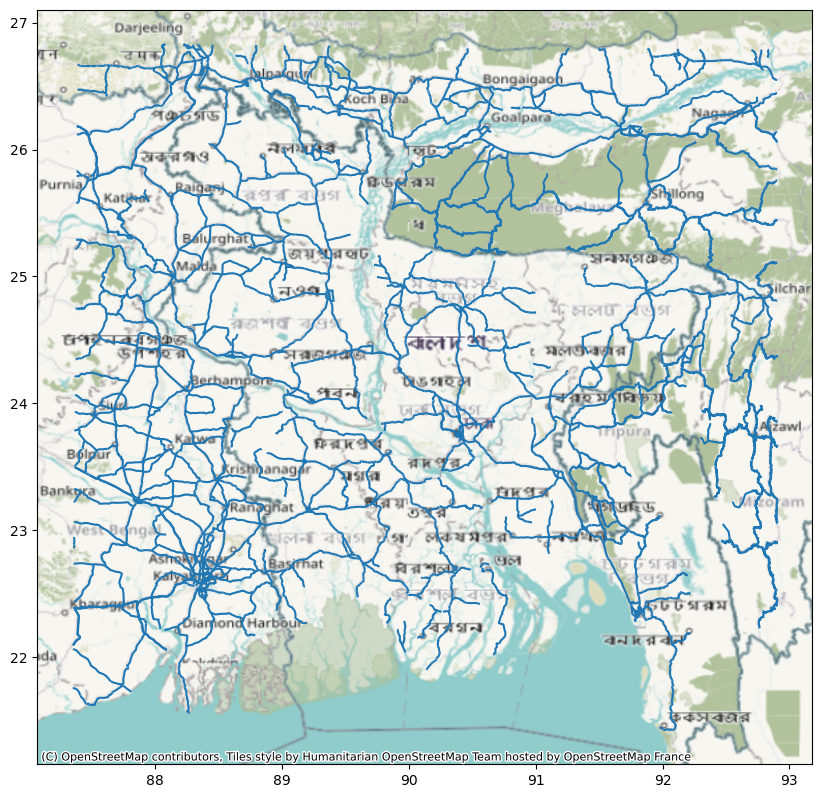

In [7]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
df_primary  =df[(df["type"]=="primary")|(df["type"]=="trunk")]
df_primary.plot(ax=ax)
cx.add_basemap(ax=ax,crs="epsg:4326")

In [8]:
from shapely import wkt

In [9]:
df_sections = pd.read_csv(main_folder_path + "\\data\\intersections.csv")#pd.read_csv(main_folder_path + "\\data\\intersections_BONUS.csv")
df_sections

,Unnamed: 0,road,chainage,lrp,lat,lon,gap,type,name,geometry,intersec_to
0,0,N1,81.801,LRP083a,23.478944,91.117722,NaN,intersection,Box culvert,POINT (91.1177216 23.4789438),N102
1,1,N1,145.409,LRP148a,23.009556,91.381360,NaN,intersection,Intersection with N104 / Km post missing,POINT (91.3813604 23.0095556),N104
2,2,N1,11.936,LRP012c,23.690416,90.546583,NaN,intersection,Right to Syedpur (R113) left to Joydebpur N105),POINT (90.546583 23.6904163),N105
3,3,N1,8.763,LRP009a,23.706083,90.521527,NaN,intersection,Road to Sylhet (N2),POINT (90.5215271 23.7060833),N2
4,4,N1,0.000,LRPS,23.706028,90.443333,NaN,intersection,Start of Road after Jatrabari Flyover infront...,POINT (90.443333 23.7060278),N8
5,5,N2,0.000,LRPS,23.705917,90.521444,NaN,intersection,Road Start from N1 at Katchpur,POINT (90.5214438 23.7059167),N1
6,6,N2,85.823,LRP086a,24.050833,91.114444,NaN,intersection,Road to Mainamoti(N102),POINT (91.1144444 24.0508333),N102
7,7,N2,11.517,LRP012c,23.785389,90.569110,BE,intersection,Bridge end,POINT (90.5691104 23.7853886),N105
8,8,N2,124.933,LRP125d,24.221277,91.364250,NaN,intersection,Box culvert,POINT (91.36425 24.2212771),N204
9,9,N2,165.116,LRP166,24.451583,91.571860,NaN,intersection,Sylhet 66 km,POINT (91.5718604 24.4515833),N207


In [10]:
main_folder_path =os.path.normpath(os.getcwd() + os.sep + os.pardir)
df_sections = pd.read_csv(main_folder_path + "\\data\\intersections_BONUS.csv")#pd.read_csv(main_folder_path + "\\data\\intersections_BONUS.csv")
df_sections["geometry"]=df_sections["0"].apply(wkt.loads)
df_sections = gpd.GeoDataFrame(df_sections,geometry="geometry", crs="EPSG:4326").drop(columns="0")
# df_sections

In [11]:
from shapely import buffer
points = []
for point in df_sections["geometry"]:
    point = buffer(point,0.1)
    points.append(point)

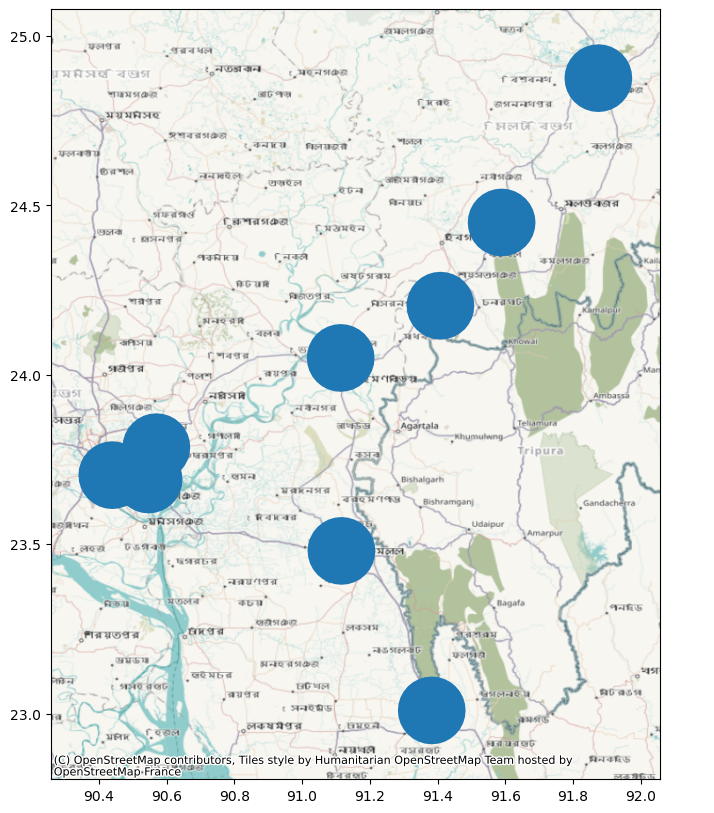

In [12]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
gpd.GeoSeries(points,crs="4326").plot(ax=ax)
cx.add_basemap(ax=ax,crs="EPSG:4326")

In [13]:
cross_index=[]
for point in points:
    for index in df_primary.index:
        if point.intersects(df_primary.loc[index,"geometry"]):
            cross_index.append(index)

intersecting =df_primary[df_primary.index.isin(cross_index)]

# intersecting_N1 =df_primary[df_primary.index.isin(cross_index_N1)]
# intersecting_N2 =df_primary[df_primary.index.isin(cross_index_N2)]
# intersecting_N1N2=pd.concat([intersecting_N1,intersecting_N2])
# intersections_N1 =gseries["N1"].intersection(intersecting_N1).drop("N1")
# intersections_N2 =gseries["N2"].intersection(intersecting_N2).drop("N2")
# 
# gdf_N1 =gdf[gdf["road"]=="N1"]
# gdf_N2 =gdf[gdf["road"]=="N2"]

<AxesSubplot:>

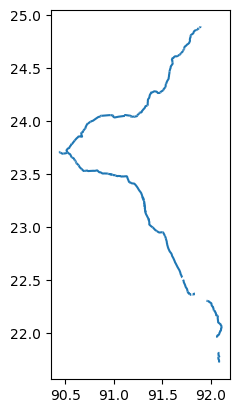

In [14]:
df_primary["ref"]=df_primary["ref"].str.replace(" ","")

df_N1N2=df_primary[(df_primary["ref"]=="N1")|(df_primary["ref"]=="N2")]
df_N1N2.plot()

In [15]:
df_normal_data = pd.read_csv(main_folder_path + "\\data\\_roads3.csv")

gdf_normal = gpd.GeoDataFrame(df_normal_data, geometry=gpd.points_from_xy(df_normal_data.lon, df_normal_data.lat), crs="EPSG:4326")
from shapely import buffer
lines = []
for name in ["N1","N2"]:
    gdf_temp = gdf_normal[gdf_normal["road"]==name]
    line = buffer(LineString(gdf_temp["geometry"]),0.1)
    lines.append(line)

In [16]:
cross_index_N1=[]
cross_index_N2=[]
for index in df_primary.index:
    if lines[0].intersects(df_primary.loc[index,"geometry"]):
        cross_index_N1.append(index)
    if lines[1].intersects(df_primary.loc[index,"geometry"]):
        cross_index_N2.append(index)


intersecting_N1 =df_primary[df_primary.index.isin(cross_index_N1)]
intersecting_N2 =df_primary[df_primary.index.isin(cross_index_N2)]
intersecting_N1N2=pd.concat([intersecting_N1,intersecting_N2])

intersecting_N1N2= intersecting_N1N2[~intersecting_N1N2["ref"].str.replace(" ","").isin(["N1","N2"])]


<AxesSubplot:>

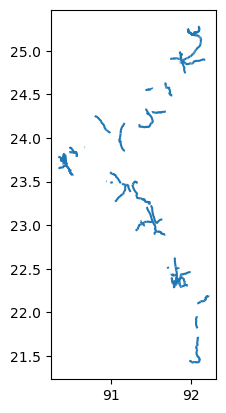

In [17]:
intersecting_N1N2.plot()

In [18]:
Intersect_points = []
for line_N1N2 in df_N1N2["geometry"]:
    for intersect_line in intersecting_N1N2["geometry"]:
        if line_N1N2!=intersect_line:
            if line_N1N2.intersects(intersect_line):
               Intersect_points.append(line_N1N2.intersection(intersect_line))
            
    

In [19]:
df_primary["ref"]=df_primary["ref"].str.replace(" ","")

df_N1N2=df_primary[(df_primary["ref"]=="N1")|(df_primary["ref"]=="N2")]

In [20]:

# df_used_intersects = pd.read_csv(main_folder_path+"\data\intersections.csv")
# gdf_used_intersects = gpd.GeoDataFrame(df_used_intersects, crs="EPSG:4326")

In [21]:
df_sections

,Unnamed: 0,geometry
0,N102,POINT (91.11616 23.48018)
1,N104,POINT (91.38273 23.00921)
2,N105,POINT (90.54676 23.69094)
3,N2,POINT (90.52082 23.70614)
4,N8,POINT (90.43951 23.70380)
5,N1,POINT (90.52082 23.70614)
6,N102,POINT (91.11385 24.04986)
7,N105,POINT (90.56965 23.78644)
8,N204,POINT (91.40840 24.20422)
9,N207,POINT (91.58901 24.44978)


In [22]:
shape_file_intersects = gpd.GeoSeries(Intersect_points,crs="4326")

<AxesSubplot:>

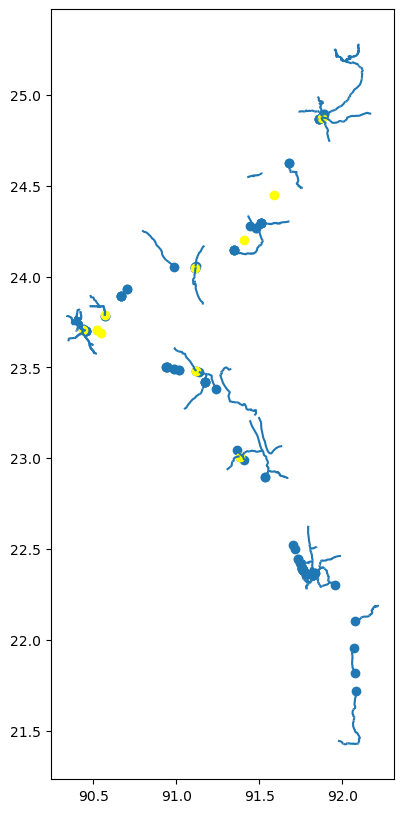

In [23]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
intersecting_N1N2.plot(ax=ax)

shape_file_intersects.plot(ax=ax)
df_sections.plot(ax=ax,color="yellow")

In [24]:
df_sections

,Unnamed: 0,geometry
0,N102,POINT (91.11616 23.48018)
1,N104,POINT (91.38273 23.00921)
2,N105,POINT (90.54676 23.69094)
3,N2,POINT (90.52082 23.70614)
4,N8,POINT (90.43951 23.70380)
5,N1,POINT (90.52082 23.70614)
6,N102,POINT (91.11385 24.04986)
7,N105,POINT (90.56965 23.78644)
8,N204,POINT (91.40840 24.20422)
9,N207,POINT (91.58901 24.44978)


In [25]:
from shapely.geometry import MultiPoint

In [26]:
something = MultiPoint([(0, 0), (1, 1), (2, 2)])
isinstance(something, MultiPoint)

True

In [27]:
 shape_file_intersects=shape_file_intersects[~shape_file_intersects.apply(lambda x: isinstance(x, MultiPoint))]

In [28]:
 # shape_file_intersects=shape_file_intersects[~shape_file_intersects.apply(lambda x: isinstance(x, MultiPoint))]

In [29]:

final_pair = []
for section in df_sections["geometry"]:
    min_dist = 10000
    for shape_file_intersect in shape_file_intersects.unique():
        
        # print(section,shape_file_intersect)
        if isinstance(shape_file_intersect, MultiPoint):
            for point in list(shape_file_intersect.geoms):
                dist = distance(section, point)
                if dist < min_dist:
                    min_dist = dist
                    closest_point_pair = (section,point)
                # print(LineString([point,section]))
        else:
            # print(LineString([shape_file_intersect,section]))
            dist = distance(section, shape_file_intersect)
            if dist < min_dist:
                min_dist = dist
                closest_point_pair = (section,shape_file_intersect)
    final_pair.append(closest_point_pair)

In [30]:
final_pair

[(<POINT (91.116 23.48)>, <POINT (91.118 23.479)>),
 (<POINT (91.383 23.009)>, <POINT (91.381 23.01)>),
 (<POINT (90.547 23.691)>, <POINT (90.452 23.702)>),
 (<POINT (90.521 23.706)>, <POINT (90.452 23.702)>),
 (<POINT (90.44 23.704)>, <POINT (90.435 23.71)>),
 (<POINT (90.521 23.706)>, <POINT (90.452 23.702)>),
 (<POINT (91.114 24.05)>, <POINT (91.114 24.05)>),
 (<POINT (90.57 23.786)>, <POINT (90.569 23.785)>),
 (<POINT (91.408 24.204)>, <POINT (91.441 24.279)>),
 (<POINT (91.589 24.45)>, <POINT (91.511 24.296)>),
 (<POINT (91.875 24.876)>, <POINT (91.875 24.878)>)]

In [31]:
for pair in final_pair:
    print(pair)

(<POINT (91.116 23.48)>, <POINT (91.118 23.479)>)
(<POINT (91.383 23.009)>, <POINT (91.381 23.01)>)
(<POINT (90.547 23.691)>, <POINT (90.452 23.702)>)
(<POINT (90.521 23.706)>, <POINT (90.452 23.702)>)
(<POINT (90.44 23.704)>, <POINT (90.435 23.71)>)
(<POINT (90.521 23.706)>, <POINT (90.452 23.702)>)
(<POINT (91.114 24.05)>, <POINT (91.114 24.05)>)
(<POINT (90.57 23.786)>, <POINT (90.569 23.785)>)
(<POINT (91.408 24.204)>, <POINT (91.441 24.279)>)
(<POINT (91.589 24.45)>, <POINT (91.511 24.296)>)
(<POINT (91.875 24.876)>, <POINT (91.875 24.878)>)


In [32]:
import matplotlib.lines as mlines


# etc etc, nine])

NameError: name 'eight' is not defined

In [33]:

transformer = Transformer.from_crs('EPSG:4326', 'EPSG:3857', always_xy=True)

267.90983518306564
149.86743626071555
10589.044312426182
7636.709413779219
923.3570400558133
7636.709413775503
69.87999331430287
180.35841309913607
9816.857199952374
20743.445042444433
212.3474922963985


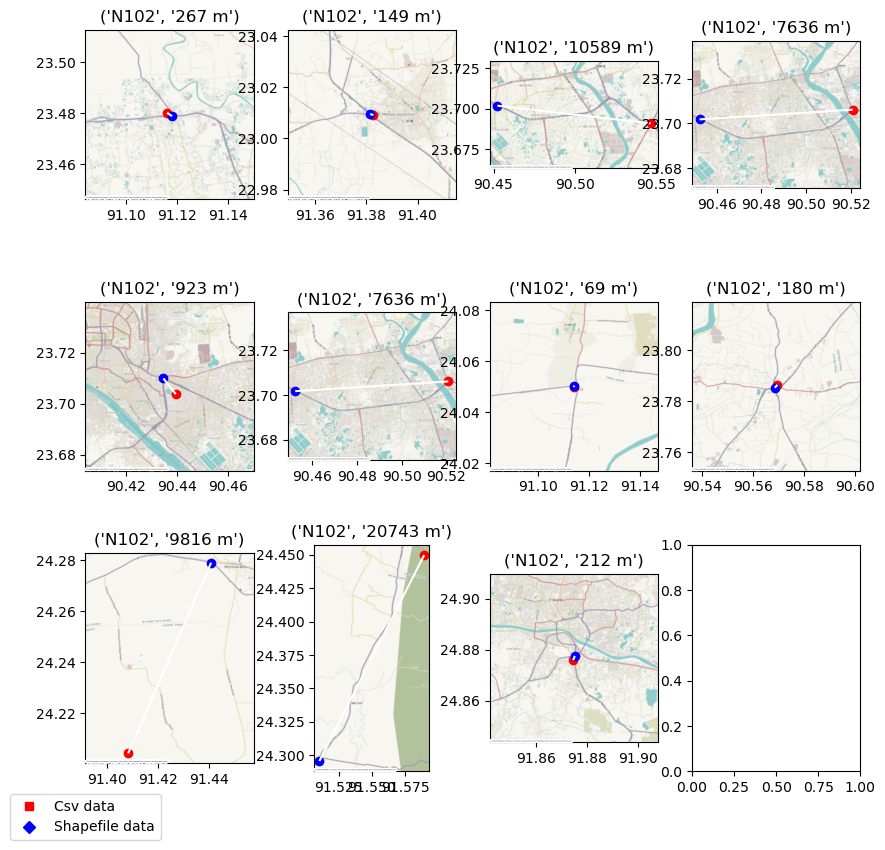

In [43]:
fig,ax=plt.subplots(3,4,figsize=(10,10))
ax =ax.flatten()
ax_count =0
dict_length = {}
orginal = mlines.Line2D([], [], color='red', marker='s', ls='', label='Csv data')
shapefile = mlines.Line2D([], [], color='blue', marker='D', ls='', label='Shapefile data')

for index, pair in enumerate(final_pair):
    line = LineString([pair[0],pair[1]])
    line_length= sp_ops.transform(transformer.transform ,line).length
    print(line_length)
    gpd.GeoSeries(pair[0],crs="EPSG:4326").plot(ax=ax[index],color="red")
    gpd.GeoSeries(pair[1],crs="EPSG:4326").plot(ax=ax[index],color="blue")
    gpd.GeoSeries(line,crs   ="EPSG:4326").plot(ax=ax[index],color="white")
    gpd.GeoSeries(buffer(line.centroid,0.03),crs   ="EPSG:4326").plot(ax=ax[index],color="pink",alpha=0)
    cx.add_basemap(ax=ax[index],crs="EPSG:4326",attribution_size=0) 
    if index == 8:
        ax[index].legend(handles=[orginal, shapefile],loc="lower center",bbox_to_anchor=(0.0, -0.4, 0.0, 0.0))
    ax[index].title.set_text((df_sections["Unnamed: 0"][0],f"{int(line_length)} m"))
    ax_count =ax_count+1
    dict_length[df_sections["Unnamed: 0"][index]]=line_length/1000
plt.show() 
    

In [40]:
dict_length

{'N102': 69.87999331430287,
 'N104': 149.86743626071555,
 'N105': 180.35841309913607,
 'N2': 7636.709413779219,
 'N8': 923.3570400558133,
 'N1': 7636.709413775503,
 'N204': 9816.857199952374,
 'N207': 20743.445042444433,
 'N208': 212.3474922963985}

Text(0.5, 1.0, 'Difference intersections shapefile and csv')

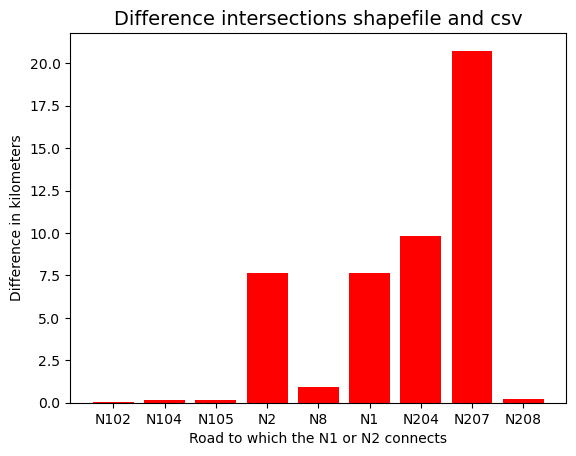

In [48]:
plt.bar(dict_length.keys(), dict_length.values(),color="red")
plt.xlabel("Road to which the N1 or N2 connects")
plt.ylabel("Difference in kilometers")
plt.title("Difference intersections shapefile and csv", fontsize = 14)

In [37]:
df_length  = pd.DataFrame.from_dict(dict_length,orient=dict_length.keys())

AttributeError: 'dict_keys' object has no attribute 'lower'

In [ ]:
shape_file_intersects

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
# gpd.GeoSeries(lines,crs="4326").plot(ax=ax,alpha=0.3)
intersecting_N1.plot(ax=ax,color="red")
intersecting_N2.plot(ax=ax,color="yellow")
df_N1N2.plot(ax=ax,color="white")
gpd.GeoSeries(Intersect_points,crs="4326").plot(ax=ax)
cx.add_basemap(ax=ax,crs="EPSG:4326")

In [ ]:
df_trunk = df_N[((df_N["ref"]=="N1")|(df_N["ref"]=="N2"))]#(df_N["type"]=="trunk")&

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(15,15))
df_trunk.plot(ax=ax)
cx.add_basemap(crs=4326,ax=ax)
plt.show()

In [ ]:
for 

In [ ]:
# main_folder_path =os.path.normpath(os.getcwd() + os.sep + os.pardir)
# df_normal_data = pd.read_csv(main_folder_path + "\\data\\_roads3.csv")
# 
# gdf_normal = gpd.GeoDataFrame(df_normal_data, geometry=gpd.points_from_xy(df_normal_data.lon, df_normal_data.lat), crs="EPSG:4326")
# 
# from shapely import buffer
# lines = []
# for name in ["N1","N2"]:
#     gdf_temp = gdf_normal[gdf_normal["road"]==name]
#     line = buffer(LineString(gdf_temp["geometry"]),0.1)
#     lines.append(line)